# MPG Regression Modeling


### 1. Load the data as a Pandas data frame and ensure that it imported correctly.

In [22]:
# import the pandas library
import pandas as pd

# import the data
auto_df = pd.read_csv('auto-mpg.csv')

# display the first few rows to ensure the data imported correctly
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 2. Begin by prepping the data for modeling:

In [23]:
# Remove the car name column
auto_df = auto_df.drop('car name', axis = 1)

# display the dataframe
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [24]:
# The horsepower column values likely imported as a string data type. 
# Figure out why and replace any strings with the column mean.

# check the horsepower columns data type
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

The horsepower column has been imported as a string data type. This is likely due to some non-numerical value(s) in the column. We can display the unique values in that column to see what needs to be replaced.

In [25]:
# display unique values in the horsepower column
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

We can see there is at least one instance of a "?" in the column. We will replace that with the column mean.

In [26]:
# replace "?" with the column mean
import numpy as np
auto_df['horsepower'] = auto_df['horsepower'].replace('?', np.mean(pd.to_numeric(auto_df['horsepower'], errors='coerce')))

# display unique values in the horsepower column
auto_df.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', 104.46938775510205, '100', '105', '175',
       '153', '180', '110', '72', '86', '70', '76', '65', '69', '60',
       '80', '54', '208', '155', '112', '92', '145', '137', '158', '167',
       '94', '107', '230', '49', '75', '91', '122', '67', '83', '78',
       '52', '61', '93', '148', '129', '96', '71', '98', '115', '53',
       '81', '79', '120', '152', '102', '108', '68', '58', '149', '89',
       '63', '48', '66', '139', '103', '125', '133', '138', '135', '142',
       '77', '62', '132', '84', '64', '74', '116', '82'], dtype=object)

In [27]:
# change the horsepower column to a numeric data type
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'], errors='coerce')

# check the horsepower columns data type
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [28]:
# Create dummy variables for the origin column.
auto_df = pd.concat([auto_df, pd.get_dummies(auto_df['origin'])], axis = 1)

# Drop the origin column
auto_df = auto_df.drop('origin', axis = 1)

# display dataframe
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


### 3. Create a correlation coefficient matrix and/or visualization. Are there features highly correlated with mpg?

In [29]:
# create a correlation matrix
corr_matrix = auto_df.corr()
corr_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,1,2,3
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,-0.568192,0.259022,0.442174
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,0.604351,-0.352861,-0.396479
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,0.651407,-0.373886,-0.433505
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,0.486083,-0.281258,-0.321325
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,0.598398,-0.298843,-0.440817
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,-0.250806,0.204473,0.109144
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,-0.139883,-0.024489,0.193101
1,-0.568192,0.604351,0.651407,0.486083,0.598398,-0.250806,-0.139883,1.000000,-0.597198,-0.643317
2,0.259022,-0.352861,-0.373886,-0.281258,-0.298843,0.204473,-0.024489,-0.597198,1.000000,-0.229895
3,0.442174,-0.396479,-0.433505,-0.321325,-0.440817,0.109144,0.193101,-0.643317,-0.229895,1.000000


Cylinders, displacement, horsepower, and weight are all highly negatively correlated with mpg.

### 4. Plot mpg versus weight. Analyze this graph and explain how it relates to the corresponding correlation coefficient.

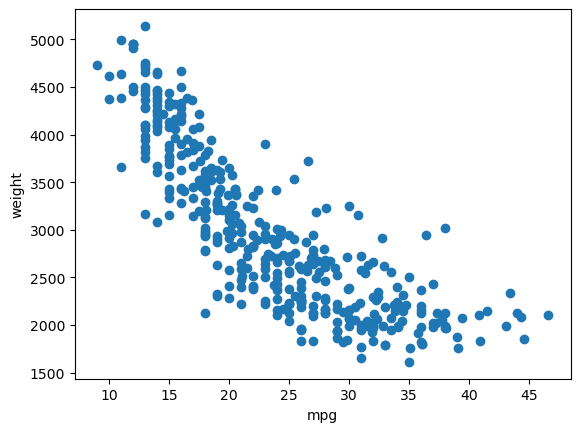

In [30]:
# create scatterplot of mpg versus weight

import matplotlib.pyplot as plt

plt.scatter(auto_df['mpg'], auto_df['weight'])
plt.xlabel('mpg')
plt.ylabel('weight')
plt.show()

As shown in the plot above, mpg is negatively correlated with weight. In other words, as the weight increases, the mpg decreases. This can be seen in the correlation matrix from the last part. Mpg and weight are shown to have a -0.83 correlation coefficient which indicates a strong negative correlation.

### 5. Randomly split the data into 80% training data and 20% test data, where your target is mpg.

In [31]:
# since mpg is the target variable, we will split that column from the rest of the data
x = auto_df.drop('mpg', axis=1)
y = auto_df['mpg']

In [32]:
# import the library
from sklearn.model_selection import train_test_split

# split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [33]:
# verify that the training and test data sets contain the correct number of data points
print("input training set: ", x_train.shape)
print("output training set: ", y_train.shape)
print("input testing set: ", x_test.shape)
print("output testing set: ", y_test.shape)
print("original data set: ", auto_df.shape)

input training set:  (318, 9)
output training set:  (318,)
input testing set:  (80, 9)
output testing set:  (80,)
original data set:  (398, 10)


### 6. Train an ordinary linear regression on the training data.

In [34]:
# import the library
from sklearn.linear_model import LinearRegression

# convert column names to strings
x_train.columns = x_train.columns.astype(str)

# create the linear model
linear_model = LinearRegression()

# train the model using the training data
linear_model.fit(x_train, y_train)

LinearRegression()

In [35]:
# Print the linear regression coefficients
pd.DataFrame(linear_model.coef_, x_train.columns, columns = ['Coeff'])

,Coeff
cylinders,-0.331880
displacement,0.016488
horsepower,-0.020538
weight,-0.006222
acceleration,-0.035295
model year,0.766048
1,-1.686293
2,0.814388
3,0.871906


### 7. Calculate R2, RMSE, and MAE on both the training and test sets and interpret your results.

In [54]:
# import the libraries
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [49]:
# convert column names to strings
x_test.columns = x_test.columns.astype(str)

# calculate predictions
test_predictions = linear_model.predict(x_test)
train_predictions = linear_model.predict(x_train)

In [44]:
# calculate R2
print("R2 for training set: ", linear_model.score(x_train, y_train))
print("R2 for testing set: ", linear_model.score(x_test, y_test))

R2 for training set:  0.8258862906206832
R2 for testing set:  0.8144710163139888


The two R2 scores calculated above indicate that the model performs fairly well. A perfectly performing model would have R2 scores of 1, so a score of 0.814 for the test data indicates that the model does a good job of predicting mpg.

In [51]:
# Calculate RMSE
print("RMSE for the training set: ", np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
print("RMSE for the testing set: ", np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

RMSE for the training set:  3.093817888194767
RMSE for the testing set:  3.9552841067473623


The above RMSE values indicate how far off the typical predicted mpg is from the actual mpg. In the training set, mpg predicted values are off by about 3.1 from the actual. For the testing set, mpg predicted values are off by about 4 from the actual.

In [55]:
# calculate MAE
print("MAE for the training set: ", mean_absolute_error(y_train, train_predictions))
print("MAE for the testing set: ", mean_absolute_error(y_test, test_predictions))

MAE for the training set:  2.4111309412377855
MAE for the testing set:  2.8705902427613736


The above MAE values give another indication of how far off the actual mpg values are from the predicted values. MAE values do not consider the direction of the errors, which is why these values differ from the RMSE values found above.

### 8. Pick another regression model and repeat the previous two steps

In [57]:
# Train a Random Forest Regression model using the data

# import the library
from sklearn.ensemble import RandomForestRegressor

# fit the regression to the data
regressor = RandomForestRegressor()
regressor.fit(x_train, y_train)

# calculate predictions
test_predictions = regressor.predict(x_test)
train_predictions = regressor.predict(x_train)

In [58]:
# calculate R2
print("R2 for training set: ", regressor.score(x_train, y_train))
print("R2 for testing set: ", regressor.score(x_test, y_test))

R2 for training set:  0.9788446746045131
R2 for testing set:  0.902491106172402


In [59]:
# Calculate RMSE
print("RMSE for the training set: ", np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
print("RMSE for the testing set: ", np.sqrt(metrics.mean_squared_error(y_test, test_predictions)))

RMSE for the training set:  1.0784204556875217
RMSE for the testing set:  2.8674372072462164


In [60]:
# calculate MAE
print("MAE for the training set: ", mean_absolute_error(y_train, train_predictions))
print("MAE for the testing set: ", mean_absolute_error(y_test, test_predictions))

MAE for the training set:  0.749094339622641
MAE for the testing set:  1.9575374999999977


The Random Forest Regression model is a better fit for this data than a Linear Regression model. This is evident by higher R2 values and lower RMSE and MAE values.